가설 1: 1월~6월중에 5월에 지하철 승객수가 많다? (기준 :승하자총승객수)
<가설검증 진행단계>
    1. N이 30보다 큰가
    2. 정규성을 만족하는가
       -> 정규성검증
    3. 통계적 분석 진행
    4. 사후분석 진행

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
sns.set_style('whitegrid')
subway_raw = pd.read_csv('subway_raw.csv')

In [3]:
#한글폰트깨짐 해결
import matplotlib.font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family'] = 'HYGungSo-Bold'

In [4]:
#데이터프레임 만들기
df_subway_01 = subway_raw.query('연월=="2019-01"')
df_subway_02 = subway_raw.query('연월=="2019-02"')
df_subway_03 = subway_raw.query('연월=="2019-03"')
df_subway_04 = subway_raw.query('연월=="2019-04"')
df_subway_05 = subway_raw.query('연월=="2019-05"')
df_subway_06 = subway_raw.query('연월=="2019-06"')

<AxesSubplot:xlabel='연월', ylabel='승하자총승객수'>

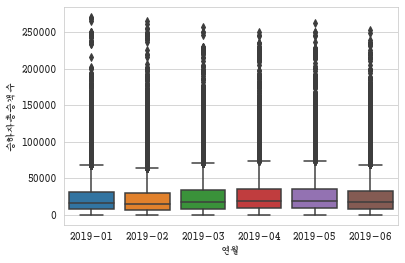

In [5]:
#데이터 프레임 합치고 박스플롯 만들기
df = pd.concat([df_subway_01,df_subway_02,df_subway_03,df_subway_04,df_subway_05,df_subway_06])
sns.boxplot(x='연월', y='승하자총승객수', data = df)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1  group2  meandiff  p-adj    lower      upper   reject
-------------------------------------------------------------
2019-01 2019-02 -1188.3972 0.0004 -1991.5265 -385.2678   True
2019-01 2019-03  1295.0194    0.0   512.8682 2077.1706   True
2019-01 2019-04  2384.0825    0.0  1595.4268 3172.7382   True
2019-01 2019-05  2340.9615    0.0  1558.7463 3123.1767   True
2019-01 2019-06   800.8965 0.0442    11.9583 1589.8348   True
2019-02 2019-03  2483.4166    0.0  1680.3703 3286.4628   True
2019-02 2019-04  3572.4797    0.0  2763.0968 4381.8626   True
2019-02 2019-05  3529.3587    0.0  2726.2501 4332.4673   True
2019-02 2019-06  1989.2937    0.0  1179.6355 2798.9519   True
2019-03 2019-04  1089.0631 0.0012    300.492 1877.6342   True
2019-03 2019-05  1045.9421 0.0019   263.8123  1828.072   True
2019-03 2019-06  -494.1229 0.4755 -1282.9765  294.7308  False
2019-04 2019-05    -43.121    1.0  -831.7555  745.5136  False
2019-04 

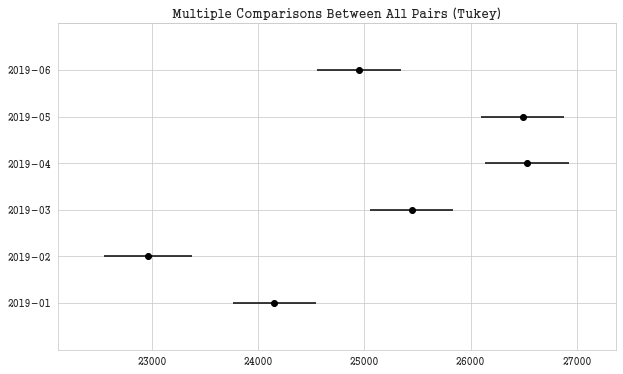

In [37]:
# 유의미한 차이 확인-> One-Way ANOVA : Tukey's test
# reject이 유의미한 차이가 있으면 True 아니면 False
# p-value를 0.05 (PPT)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(df['승하자총승객수'], df['연월'], alpha=0.05)
print(posthoc)
fig = posthoc.plot_simultaneous()